In [ ]:
!nvidia-smi

Thu Jun  3 06:09:21 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
!rm -rf 100-bird-species

In [1]:
import os
import zipfile
root = '/content/kaggle.json'
if (os.path.exists(root)):
  print("Key already exist")
else:
  !wget --no-check-certificate \https://www.dropbox.com/s/mdgus2fvrjye9wx/kaggle.json?dl=1 -O /content/kaggle.json
os.environ['KAGGLE_CONFIG_DIR'] = "/content/"
!chmod 600 /content/kaggle.json
%cd /content/
medium = '/content/270 Bird Species also see 73 Sports Dataset.zip'
if (os.path.exists(medium)):
  print("Dataset already exist")
else:
  !kaggle datasets download -d gpiosenka/100-bird-species

os.mkdir('/content/270 Bird Species also see 73 Sports Dataset/')

loc = '/content/100-bird-species.zip'
ex = zipfile.ZipFile(loc, 'r')
ex.extractall('/content/100-bird-species/')
os.remove(loc)
ex.close()

--2021-06-04 02:40:15--  https://www.dropbox.com/s/mdgus2fvrjye9wx/kaggle.json?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6020:18::a27d:4012
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/mdgus2fvrjye9wx/kaggle.json [following]
--2021-06-04 02:40:15--  https://www.dropbox.com/s/dl/mdgus2fvrjye9wx/kaggle.json
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc0114bf65757947f556c5728da5.dl.dropboxusercontent.com/cd/0/get/BPxrqOackhgY7VBZryH7Tn-VDU71W-f3oUnRVQV1aAJ6MlQHVuTJIe8xP0FML74H2doL_LA3W_a3-MO9qRQTtouEA5EhRCVcWzSu3AEvStH7gD5PRi_Y7Re-gIwfxRVsoKFjrMfGEsD4inxTy6Bmappa/file?dl=1# [following]
--2021-06-04 02:40:16--  https://uc0114bf65757947f556c5728da5.dl.dropboxusercontent.com/cd/0/get/BPxrqOackhgY7VBZryH7Tn-VDU71W-f3oUnRVQV1aAJ6MlQHVuTJIe8xP0FML74H2doL_LA3W_a3-MO9qRQTtouEA5

In [2]:
traindir = '100-bird-species/train'
testdir = '100-bird-species/test'
validdir = '100-bird-species/valid'

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [4]:
#Inisialisasi Parameter
height = 224
width = 224
channels = 3
img_size = (height, width)

In [5]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 90,
    horizontal_flip = True,
    shear_range = 0.2,
    zoom_range = 0.2,
    fill_mode = 'nearest')

test_val_datagen = ImageDataGenerator(rescale = 1./255)
print("Train")
train_generator = image_dataset_from_directory(
    traindir,
    shuffle = True,
    batch_size = 32,
    image_size = img_size
    )
print("Valid")
val_generator = image_dataset_from_directory(
    validdir,
    shuffle = True,
    batch_size = 32,
    image_size = img_size
)
print("Test")
test_generator = image_dataset_from_directory(
    testdir,
    shuffle = True,
    batch_size = 32,
    image_size = img_size
) 

Train
Found 38518 files belonging to 270 classes.
Valid
Found 1350 files belonging to 270 classes.
Test
Found 1350 files belonging to 270 classes.


In [6]:
import tensorflow as tf

data_augmentation = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
  tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),])

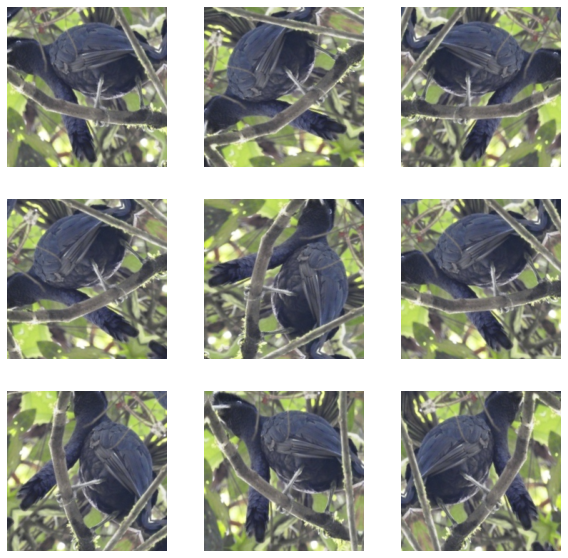

In [7]:
import matplotlib.pyplot as plt

for image, _ in train_generator.take(1) :
  plt.figure(figsize= (10, 10))
  first_image = image[0]
  for i in range(9) :
    ax = plt.subplot(3, 3, i + 1)
    augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
    plt.imshow(augmented_image[0] / 255)
    plt.axis('off')

In [8]:
from tensorflow.keras.applications import EfficientNetB0

In [9]:
shape = img_size+(3,)
base_model = EfficientNetB0(
    include_top=False,
    weights='imagenet',
    pooling='max',
    input_shape=shape
)

base_model.summary()
print(shape)

16711680/16705208 [==============================] - 0s 0us/step
Model: "efficientnetb0"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, 224, 224, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
normalization (Normalization)   (None, 224, 224, 3)  7           rescaling[0][0]                  
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 225, 225, 3)  0           normalization[0][0]              
____________________

In [10]:
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

In [11]:
model = tf.keras.Sequential([
    base_model, tf.keras.layers.Dense(270, activation='softmax')
])
lr=0.001
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
# inputs = tf.keras.Input(shape=(224, 224, 3))
# x = data_augmentation(inputs)
# x = base_model(x, training=False)
# x = global_average_layer(x)
# x = tf.keras.layers.Dropout(0.2)(x)
# outputs = tf.keras.layers.Dense(270, activation = 'softmax')(x)
# model = tf.keras.Model(inputs, outputs)

In [13]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard

earlystop = EarlyStopping(monitor='val_loss',
                          min_delta=0.001,
                          patience=10,
                          verbose=2,
                          mode='auto')

checkpoint = ModelCheckpoint('./base.model',
                             monitor='val_loss',
                             verbose=2,
                             save_best_only=True,
                             mode='min',
                             save_weights_only=False)

tensorboard = TensorBoard(log_dir = 'logs',
                          histogram_freq=0)

callbacks = [earlystop, checkpoint, tensorboard]

In [14]:
from keras.optimizers import Adam

base_learning_rate = 0.0001
model.compile(optimizer=Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['acc'])

In [15]:
epoch = 10
history = model.fit(train_generator,
                    epochs=epoch,
                    validation_data=val_generator,
                    callbacks = callbacks)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/backend.py:4930: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


1204/1204 [==============================] - 442s 335ms/step - loss: 2.7472 - acc: 0.5095 - val_loss: 0.2556 - val_acc: 0.9304

Epoch 00001: val_loss improved from inf to 0.25560, saving model to ./base.model


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: ./base.model/assets
Epoch 2/10
1204/1204 [==============================] - 396s 329ms/step - loss: 0.3745 - acc: 0.9015 - val_loss: 0.1181 - val_acc: 0.9644

Epoch 00002: val_loss improved from 0.25560 to 0.11806, saving model to ./base.model


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: ./base.model/assets
Epoch 3/10
1204/1204 [==============================] - 400s 332ms/step - loss: 0.1673 - acc: 0.9547 - val_loss: 0.0921 - val_acc: 0.9711

Epoch 00003: val_loss improved from 0.11806 to 0.09206, saving model to ./base.model


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: ./base.model/assets
Epoch 4/10
1204/1204 [==============================] - 400s 332ms/step - loss: 0.0924 - acc: 0.9736 - val_loss: 0.1031 - val_acc: 0.9726

Epoch 00004: val_loss did not improve from 0.09206
Epoch 5/10
1204/1204 [==============================] - 400s 332ms/step - loss: 0.0639 - acc: 0.9821 - val_loss: 0.0799 - val_acc: 0.9711

Epoch 00005: val_loss improved from 0.09206 to 0.07988, saving model to ./base.model


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: ./base.model/assets
Epoch 6/10
1204/1204 [==============================] - 397s 330ms/step - loss: 0.0453 - acc: 0.9867 - val_loss: 0.0934 - val_acc: 0.9674

Epoch 00006: val_loss did not improve from 0.07988
Epoch 7/10
1204/1204 [==============================] - 400s 332ms/step - loss: 0.0399 - acc: 0.9885 - val_loss: 0.0728 - val_acc: 0.9748

Epoch 00007: val_loss improved from 0.07988 to 0.07279, saving model to ./base.model


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: ./base.model/assets
Epoch 8/10
1204/1204 [==============================] - 400s 332ms/step - loss: 0.0358 - acc: 0.9891 - val_loss: 0.0882 - val_acc: 0.9807

Epoch 00008: val_loss did not improve from 0.07279
Epoch 9/10
1204/1204 [==============================] - 400s 332ms/step - loss: 0.0289 - acc: 0.9914 - val_loss: 0.1080 - val_acc: 0.9748

Epoch 00009: val_loss did not improve from 0.07279
Epoch 10/10
1204/1204 [==============================] - 399s 332ms/step - loss: 0.0275 - acc: 0.9921 - val_loss: 0.0886 - val_acc: 0.9719

Epoch 00010: val_loss did not improve from 0.07279


In [16]:
_, accuracy = model.evaluate(test_generator)
print('Accuracy: %.f' % (accuracy*100)+'%')

43/43 [==============================] - 4s 83ms/step - loss: 0.0657 - acc: 0.9852
Accuracy: 99%


In [17]:
pip install visualkeras --upgrade

     |████████████████████████████████| 798kB 6.7MB/s 


In [18]:
import visualkeras
from PIL import ImageFont

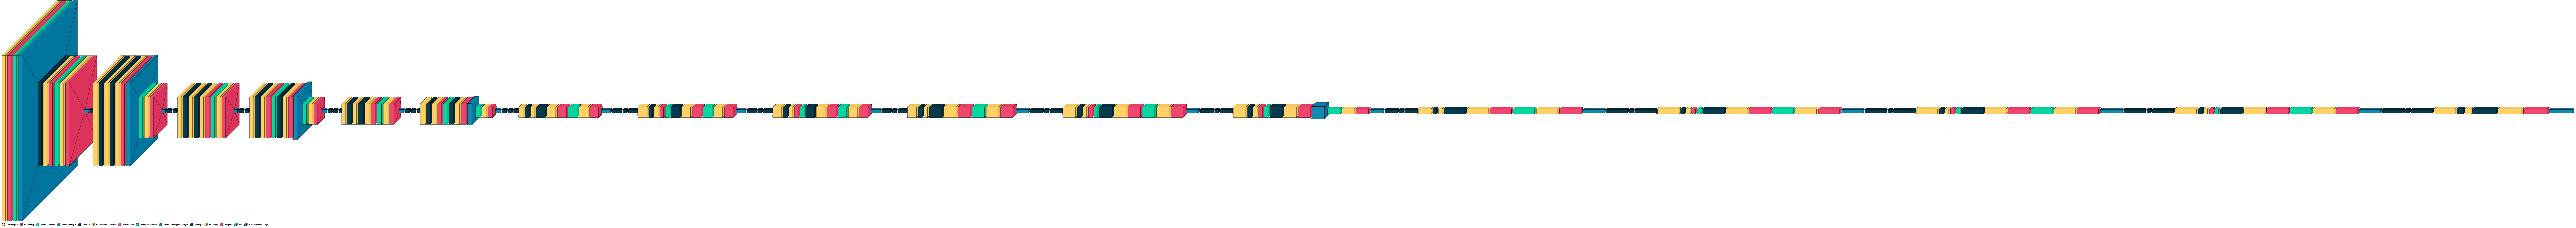

In [19]:
visualkeras.layered_view(base_model).show()
visualkeras.layered_view(base_model, to_file='output.png')
visualkeras.layered_view(base_model, to_file='output.png').show()

visualkeras.layered_view(base_model, legend=True) 

Text(0.5, 1.0, 'RED HEADED WOODPECKER')

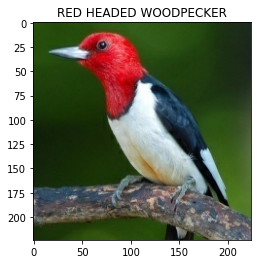

In [20]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

# uploaded = files.upload()

# class_names = train_generator.class_names

# image_batch, label_batch = test_generator.as_numpy_iterator().next()
# img = image_batch[0]
# x = np.expand_dims(img, axis=0)
# label = label_batch[0]

# plt.imshow(img/255)
# plt.title(class_names[label])

# for fn in uploaded.keys():

class_names = train_generator.class_names

image_batch, label_batch = next(iter(test_generator))
img = image_batch[0]
x = np.expand_dims(img, axis=0)
label = label_batch[0]

plt.imshow(img/255)
plt.title(class_names[label])

In [22]:
predict = model.predict(x)
print(predict)

[[2.56772346e-11 2.11248623e-11 1.38699303e-16 3.75497214e-13
  2.29338705e-12 5.64378785e-13 9.21423483e-17 5.49760015e-10
  8.61707285e-15 3.71287829e-15 2.36901265e-13 1.02764646e-11
  7.65441044e-11 4.04787581e-09 1.00587815e-04 6.60159843e-11
  6.31184177e-16 1.42205312e-12 1.16673149e-09 8.02062949e-09
  3.42664785e-11 6.98396326e-15 5.98360554e-13 3.17092852e-10
  4.41042905e-12 2.84670620e-09 2.24236345e-07 4.41877925e-13
  1.26193101e-11 9.86606955e-13 9.96235316e-10 5.10815458e-15
  5.90343330e-10 3.63575299e-13 2.36215788e-14 3.42055079e-10
  1.07746310e-08 1.08379153e-14 2.06017034e-13 3.79701560e-14
  7.81845088e-14 5.92291105e-10 8.82494577e-17 1.19247543e-14
  5.25109289e-10 2.49985455e-08 4.01438153e-14 9.77037893e-16
  7.88932504e-13 6.03834745e-14 3.10077247e-14 1.47729932e-13
  2.80931094e-12 1.48694991e-14 2.23376154e-13 9.25010502e-13
  1.63316203e-12 1.41630851e-09 7.00096231e-13 4.69022932e-13
  5.57768718e-12 1.19841745e-14 1.90401445e-15 2.90784627e-12
  3.2270

In [23]:
result_acc = np.amax(predict[0])
result_acc

0.9998987

which index that contains the prediction

In [24]:
result_idx = np.argmax(predict[0], axis=-1)
result_idx

204

In [26]:
final_result = class_names[result_idx]
final_result

'RED HEADED WOODPECKER'